# Task 1: Regression

### Using linear regression (simple or multiple), to develop a model to predict the price of a house

In [1]:
#IMPORTING LIBRARIES
import numpy as np
from pandas import *
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#Loading The DataSet
dataSet =read_csv("houseprice_data.csv")

In [3]:
dataSet

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Processing and  Exploring our dataset

In [4]:
#understanding the type of variables of the dataset
dataSet.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### Using the describe method we obtain a statistical summary of the dataframe.

In [5]:
dataSet.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Checking if there is any missing value in our dataset

In [6]:
print("number of NaN values for the columns :", dataSet.isnull().sum())

number of NaN values for the columns : price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


#### plotting a correlation heatmap

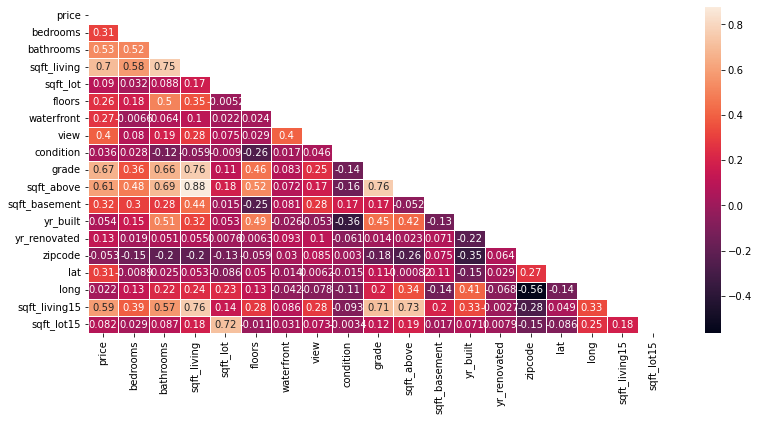

In [7]:
plt.figure(figsize=(13, 6))
mask = np.triu(np.ones_like(dataSet.corr()))
dataplot = sns.heatmap(dataSet.corr(),linewidths=1, annot=True, mask=mask)

#### sorting the correlation

In [8]:
dataSet.corr()['price'].sort_values()

zipcode         -0.053168
long             0.021571
condition        0.036392
yr_built         0.053982
sqft_lot15       0.082456
sqft_lot         0.089655
yr_renovated     0.126442
floors           0.256786
waterfront       0.266331
lat              0.306919
bedrooms         0.308338
sqft_basement    0.323837
view             0.397346
bathrooms        0.525134
sqft_living15    0.585374
sqft_above       0.605566
grade            0.667463
sqft_living      0.702044
price            1.000000
Name: price, dtype: float64

#### Using the boxplot function let's determine whether houses with a waterfront view or without a waterfront view have more price outliers.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

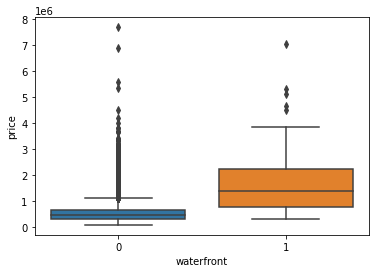

In [9]:
sns.boxplot(x = 'waterfront', y = 'price', data=dataSet)

From the above diagram there is an indication that waterfront is positively related to price

### Using the regplot plot function to determine whether "sqft_living" have more price correlation.

(0.0, 8084027.781418472)

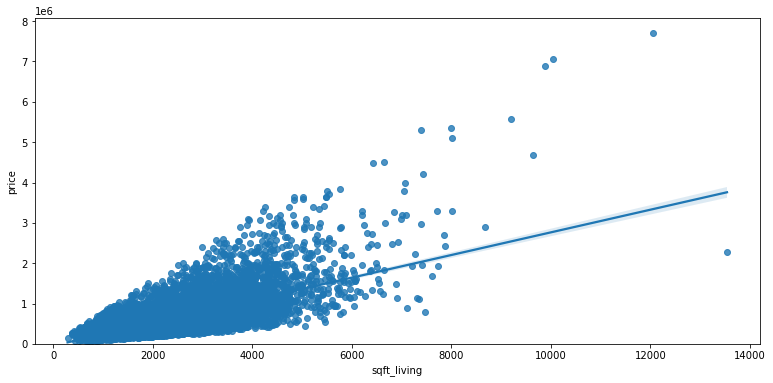

In [10]:
width = 13
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="sqft_living", y="price", data=dataSet)
plt.ylim(0,)

From the regplot above as "sqft_living" goes up, the price goes up: this indicates a positive correlation between these two variables. Sqft_living seems like a pretty good predictor of price.

# Model Development
First we create the linear regression object, next
create a linear function with "waterfront" as the predictor variable and "price" as the target variable.

In [11]:
#Creating the linear regression
lr = LinearRegression()
X = dataSet[['sqft_living']]
Y = dataSet['price']

#fitting our model
lr.fit(X,Y)


LinearRegression()

In [12]:
lr.intercept_  # gives the value of the intercept (a)?

-43867.60153385613

In [13]:
lr.coef_  # gives the value of the slope (b)?

array([280.80668993])

### Price = -43867.60 + 280.80 x waterfront

(0.0, 8084004.700793462)

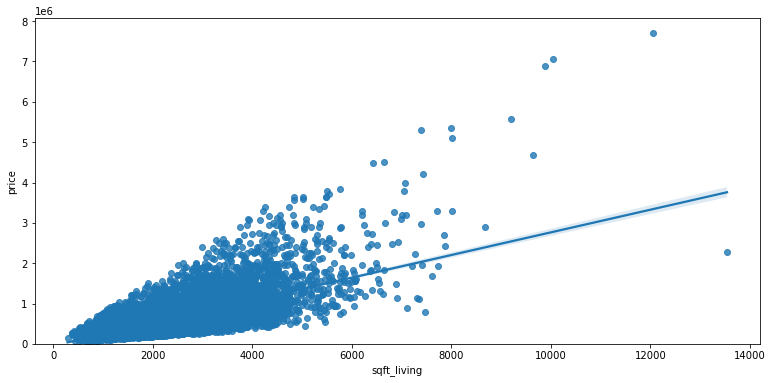

In [14]:
plt.figure(figsize=(width, height))
sns.regplot(x="sqft_living", y="price", data=dataSet)
plt.ylim(0,)

In [15]:
lr.score(X, Y)

0.49286538652201417

##### From the above value(R square), we can say that approximately 49.287% of the variation of price is explained by this simple linear model.

# Including as many features as we can.

Adding Multiple Features(Multiple Linear Regression).
From our exploration we know that other good predictors of price could be:

sqft_basement    
view            
bathrooms       
sqft_living15   
sqft_above      
grade          
sqft_living    
price

In [16]:
#we store these predictors in a variable
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [17]:
#Creating the linear regression
lr = LinearRegression()
a = dataSet[features]
b = dataSet['price']

#fitting our modell

lr.fit(a,b)
lr.score(a, b)

0.657696530792923

##### From the value that we get, we can say that approximately 65.77% of the variation of price is explained by the linear model using multiple features.

In [18]:
lr.intercept_ # gives the value of the intercept (a)?


-32402857.84120668

In [19]:
lr.coef_ # gives the value of the slope (b)?

array([-3.06406791e+04,  6.05778021e+05,  6.73263225e+05, -2.58565872e+04,
       -1.69062254e+14,  6.71420594e+04, -3.46337077e+03,  4.29399181e+00,
       -1.69062254e+14,  8.22627157e+04,  1.69062254e+14])

# Does the model improve?
 Yes!
 
 From the above result adding multiple faetures Improves Model 

#  Making further improvements
The model can be improved by transforming one or more variables and setting the regularisation parameter to 0.1

### spliting the data into training and testing set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = dataSet[features]
Y = dataSet['price']
#using a test size of 20%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.651451549316568

In [22]:
from sklearn.linear_model import Ridge
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.715768090776223

### plotting a residual plot

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

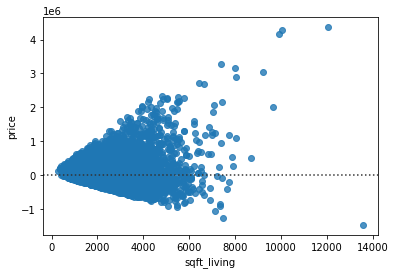

In [24]:
x = dataSet['sqft_living']
y = dataSet['price']
sns.residplot(x,y)

There is no curvature. Thus this type of residual plot suggests a linear model is appropriate

# What can you conclude about your model?

Comparing these three models, I conclude that the linear regression model is a good model to be able to predict price from our dataset. This result makes sense since we have 19 variables in total and we know that more than one of those variables are potential predictors of the final house price.